# Resumen salida Simgen en python

## Importamos Librerías y Config

In [159]:
import pandas as pd
import os, glob
from datetime import timedelta
from dateutil.relativedelta import relativedelta
def remove_duplicates(l):
    return list(set(l))
#config
path = "C:/Users/Pablo/Dropbox/cazalac/simgen_mexico_san_lucas/output_sim/mensual/" #path ruta a salida mensual simgen, con / al final
salida = "C:/Users/Pablo/Dropbox/cazalac/simgen_mexico_san_lucas/otros_scripts/resumen/" #archivo resumen de salida
#si no queremos usar todos los percentiles en el directorio mensuales, usar segunda opción.
#percentiles = ['15','25','50','75','85','95'] #percentiles de simgen a utilizar
percentiles = os.listdir(path) #obtenemos los percentiles a utilizar
print percentiles
inicio=1980
final=2090

['5', '50', '95']


In [191]:
rangoy = round((final-inicio)/10-1,0)
ppresumen = []
ttresumen = []
periodo = []
ppgraf = []
pptemp = []
#genero un df
resumenpp = pd.DataFrame(index = range(0,int(rangoy-1)), columns = ['borrar'])
resumentt = pd.DataFrame(index = range(0,int(rangoy-1)), columns = ['borrar'])
for nn in range(0,len(percentiles)):
    os.chdir(path+percentiles[nn])
    simt = []
    for file in glob.glob("pp_*.csv"):
        simt.append(file[-10:-4])
    sim = remove_duplicates(simt)
    sim = [s.replace('pp_', '') for s in sim]
    sim = [s.replace('p_', '') for s in sim]
    print str("--Percentil: ")+str(percentiles[nn])
    for i in range(0,len(sim)):
        ppgraf = []
        pptemp = []
        print "Trabajando en sim: "+str(sim[i]+"2010-2090")
        pp = pd.read_csv("pp_"+str(sim[i])+".csv", sep=",")
        pp.index = pd.date_range('01/01/1980', periods=len(pp), freq='M')
        tt = pd.read_csv("tprom_"+str(sim[i])+".csv", sep=",")
        tt.index = pd.date_range('01/01/1980', periods=len(tt), freq='M')
        del pp['Unnamed: 0'] 
        del tt['Unnamed: 0'] 
        #archivo de pp
        #mask = (pp.index > '1971-01-01') & (pp.index < '1985-01-01')
        #promedio 1980-2010
        maskpp2 = (pp.index > pd.to_datetime('2009-12-31'))
        print pp[maskpp2].resample('A').sum().mean().mean()
        print tt[maskpp2].resample('A').mean().mean().mean()
        
        
        for rangodefecha in range(0,int(rangoy)-1):
            if(rangodefecha == 0):
                #periodo de 1980 - 2010
                maskpp = (pp.index > pd.to_datetime('1979-12-31')+relativedelta(years=rangodefecha*10)) & (pp.index < pd.to_datetime('2011-01-01')+relativedelta(years=rangodefecha*10))
                #print str("(precipitacion,temperatura) 1980-2010")
                #print str(pp[maskpp].resample('A').sum().mean().mean())+","+str(tt[maskpp].resample('A').mean().mean().mean())
                #resumen[str(sim[i])+str("_pp")] = pp[maskpp].resample('A').sum().mean().mean()
                #resumen[str(sim[i])+str("_tt")] = tt[maskpp].resample('A').mean().mean().mean()
        #        ppresumen.append(pp[maskpp].resample('A').sum().mean().mean())
         #       ttresumen.append(tt[maskpp].resample('A').mean().mean().mean())
        #      periodo.append("1980-2010")
           #     maskpp2 = (pp.index > pd.to_datetime('2009-12-31'))
                #prom,%5,95%
        #        print "hasta 2010: prom,5%,95%,2010-2099"
         #       print pp[maskpp].resample('A').sum().mean().mean()
        #      print pp[maskpp].resample('A').sum().quantile(.05).mean()
        #        print pp[maskpp].resample('A').sum().quantile(.95).mean()
        #        print tt[maskpp].resample('A').mean().mean().mean()
        #        print tt[maskpp].resample('A').mean().quantile(.05).mean()
        #        print tt[maskpp].resample('A').mean().quantile(.95).mean()
                
                #print str("Percentil 5%")
                #print str(pp[maskpp].resample('A').sum().quantile(.05).mean())+","+str(tt[maskpp].resample('A').mean().quantile(.05).mean())
                #print str("Percentil 50%")
                #print str(pp[maskpp].resample('A').sum().quantile(.5).mean())+","+str(tt[maskpp].resample('A').mean().quantile(.5).mean())
                #print str("Percentil 95%")
                #print str(pp[maskpp].resample('A').sum().quantile(.95).mean())+","+str(tt[maskpp].resample('A').mean().quantile(.95).mean())
                #print str("(precipitacion,temperatura) 2010-2090")
                #print pp[maskpp].resample('A').sum().quantile(.95).mean()
                #print tt[maskpp].resample('A').mean().quantile(.95).mean()
            else:
                #periodo de 10 años siguientes
                maskpp = (pp.index > pd.to_datetime('1999-12-31')+relativedelta(years=rangodefecha*10)) & (pp.index < pd.to_datetime('2011-01-01')+relativedelta(years=rangodefecha*10))
                #print str("(precipitacion,temperatura )"+str(2000+rangodefecha*10)+"-"+str(2010+rangodefecha*10))
                #prom,%5,95%,
                #print str(pp[maskpp].resample('A').sum().mean().mean())+","+str(tt[maskpp].resample('A').mean().mean().mean())
                ppresumen.append(pp[maskpp].resample('A').sum().mean().mean())
                ttresumen.append(tt[maskpp].resample('A').mean().mean().mean())
                periodo.append(str(2000+rangodefecha*10)+"-"+str(2010+rangodefecha*10))
        #resumenpp.index = periodo
        ##resumentt.index = periodo
        ##resumenpp[str("P")+str(percentiles[nn])+"-simix"+str(sim[i])+str("-Prec")] = ppresumen
        #resumentt[str("P")+str(percentiles[nn])+"-simix"+str(sim[i])+str("-Temp")] = ttresumen
        #ppresumen = []
        #ttresumen = []
        #periodo = []
#del resumenpp["borrar"]
#del resumentt["borrar"]

--Percentil: 5
Trabajando en sim: 9982010-2090
247.57345679
26.8823261791
Trabajando en sim: 3742010-2090
246.713580247
26.8815533949
--Percentil: 50
Trabajando en sim: 9982010-2090
262.914197531
26.181431941
Trabajando en sim: 3742010-2090
265.400617284
26.1783958375
--Percentil: 95
Trabajando en sim: 9982010-2090
283.895679012
25.4998181612
Trabajando en sim: 3742010-2090
282.914197531
25.4994439513


In [175]:
rangoy = round((final-inicio)/10-1,0)
ppresumen = []
ttresumen = []
periodo = []
#genero un df
resumenpp = pd.DataFrame(index = range(0,int(rangoy-1)), columns = ['borrar'])
resumentt = pd.DataFrame(index = range(0,int(rangoy-1)), columns = ['borrar'])
for nn in range(0,len(percentiles)):
    os.chdir(path+percentiles[nn])
    simt = []
    for file in glob.glob("pp_*.csv"):
        simt.append(file[-10:-4])
    sim = remove_duplicates(simt)
    sim = [s.replace('pp_', '') for s in sim]
    sim = [s.replace('p_', '') for s in sim]
    print str("--Percentil: ")+str(percentiles[nn])
    for i in range(0,len(sim)):
        print "Trabajando en sim: "+str(sim[i])
        pp = pd.read_csv("pp_"+str(sim[i])+".csv", sep=",")
        pp.index = pd.date_range('01/01/1980', periods=len(pp), freq='M')
        tt = pd.read_csv("tprom_"+str(sim[i])+".csv", sep=",")
        tt.index = pd.date_range('01/01/1980', periods=len(tt), freq='M')
        del pp['Unnamed: 0'] 
        del tt['Unnamed: 0'] 
        #archivo de pp
        #mask = (pp.index > '1971-01-01') & (pp.index < '1985-01-01')
        #promedio 1980-2010
        for rangodefecha in range(0,int(rangoy)-1):
            if(rangodefecha == 0):
                #periodo de 1980 - 2010
                maskpp = (pp.index > pd.to_datetime('1979-12-31')+relativedelta(years=rangodefecha*10)) & (pp.index < pd.to_datetime('2011-01-01')+relativedelta(years=rangodefecha*10))
                print str("(precipitacion,temperatura) 1980-2010")
                print str(pp[maskpp].resample('A').sum().mean().mean())+","+str(tt[maskpp].resample('A').mean().mean().mean())
                #resumen[str(sim[i])+str("_pp")] = pp[maskpp].resample('A').sum().mean().mean()
                #resumen[str(sim[i])+str("_tt")] = tt[maskpp].resample('A').mean().mean().mean()
                ppresumen.append(pp[maskpp].resample('A').sum().mean().mean())
                ttresumen.append(tt[maskpp].resample('A').mean().mean().mean())
                periodo.append("1980-2010")
                maskpp2 = (pp.index > pd.to_datetime('2009-12-31'))
                print str("Percentil 5%")
                print str(pp[maskpp].resample('A').sum().quantile(.05).mean())+","+str(tt[maskpp].resample('A').mean().quantile(.05).mean())
                print str("Percentil 50%")
                print str(pp[maskpp].resample('A').sum().quantile(.5).mean())+","+str(tt[maskpp].resample('A').mean().quantile(.5).mean())
                print str("Percentil 95%")
                print str(pp[maskpp].resample('A').sum().quantile(.95).mean())+","+str(tt[maskpp].resample('A').mean().quantile(.95).mean())
                print str("(precipitacion,temperatura) 2010-2090")
                print str(pp[maskpp2].resample('A').sum().mean().mean())+","+str(tt[maskpp2].resample('A').mean().mean().mean())
            else:
                #periodo de 10 años siguientes
                maskpp = (pp.index > pd.to_datetime('1999-12-31')+relativedelta(years=rangodefecha*10)) & (pp.index < pd.to_datetime('2011-01-01')+relativedelta(years=rangodefecha*10))
                print str("(precipitacion,temperatura )"+str(2000+rangodefecha*10)+"-"+str(2010+rangodefecha*10))
                print str(pp[maskpp].resample('A').sum().mean().mean())+","+str(tt[maskpp].resample('A').mean().mean().mean())
                ppresumen.append(pp[maskpp].resample('A').sum().mean().mean())
                ttresumen.append(tt[maskpp].resample('A').mean().mean().mean())
                periodo.append(str(2000+rangodefecha*10)+"-"+str(2010+rangodefecha*10))
        resumenpp.index = periodo
        resumentt.index = periodo
        resumenpp[str("P")+str(percentiles[nn])+"-simix"+str(sim[i])+str("-Prec")] = ppresumen
        resumentt[str("P")+str(percentiles[nn])+"-simix"+str(sim[i])+str("-Temp")] = ttresumen
        ppresumen = []
        ttresumen = []
        periodo = []
del resumenpp["borrar"]
del resumentt["borrar"]

--Percentil: 5
Trabajando en sim: 998
(precipitacion,temperatura) 1980-2010
316.620967742,23.0093320772
Percentil 5%
96.525,21.4548317189
Percentil 50%
315.9,22.8891769625
Percentil 95%
549.1,24.4444359005
(precipitacion,temperatura) 2010-2090
247.57345679,26.8823261791
(precipitacion,temperatura )2010-2020
307.313636364,24.3189255503
(precipitacion,temperatura )2020-2030
262.35,25.8226124892
(precipitacion,temperatura )2030-2040
248.968181818,25.9083563241
(precipitacion,temperatura )2040-2050
194.359090909,27.0574479104
(precipitacion,temperatura )2050-2060
241.240909091,27.8062736309
(precipitacion,temperatura )2060-2070
232.390909091,27.656282929
(precipitacion,temperatura )2070-2080
259.354545455,28.0479085413
(precipitacion,temperatura )2080-2090
237.531818182,28.2783014547
Trabajando en sim: 374
(precipitacion,temperatura) 1980-2010
316.620967742,23.0093320772
Percentil 5%
96.525,21.4548317189
Percentil 50%
315.9,22.8891769625
Percentil 95%
549.1,24.4444359005
(precipitacion,tem

In [176]:
#Exportamos
resumenpp.to_excel(str(salida)+"pp.xls",sheet_name="pp")
resumentt.to_excel(str(salida)+"tt.xls",sheet_name="tt")

,P5-simix998-Prec,P5-simix374-Prec,P50-simix998-Prec,P50-simix374-Prec,P95-simix998-Prec,P95-simix374-Prec
1980-2010,316.620968,316.620968,316.620968,316.620968,316.620968,316.620968
2010-2020,307.313636,288.550000,318.104545,305.440909,318.759091,267.163636
2020-2030,262.350000,261.263636,245.304545,277.531818,265.436364,278.554545
2030-2040,248.968182,260.259091,257.904545,256.000000,270.200000,274.563636
2040-2050,194.359091,272.695455,192.545455,287.086364,240.631818,313.309091
2050-2060,241.240909,236.222727,291.218182,225.363636,313.622727,239.059091
2060-2070,232.390909,192.936364,246.900000,213.872727,257.000000,255.590909
2070-2080,259.354545,239.927273,291.550000,284.600000,329.990909,307.450000
2080-2090,237.531818,255.136364,261.781818,293.859091,277.890909,345.995455


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10EDEED0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11147690>], dtype=object)

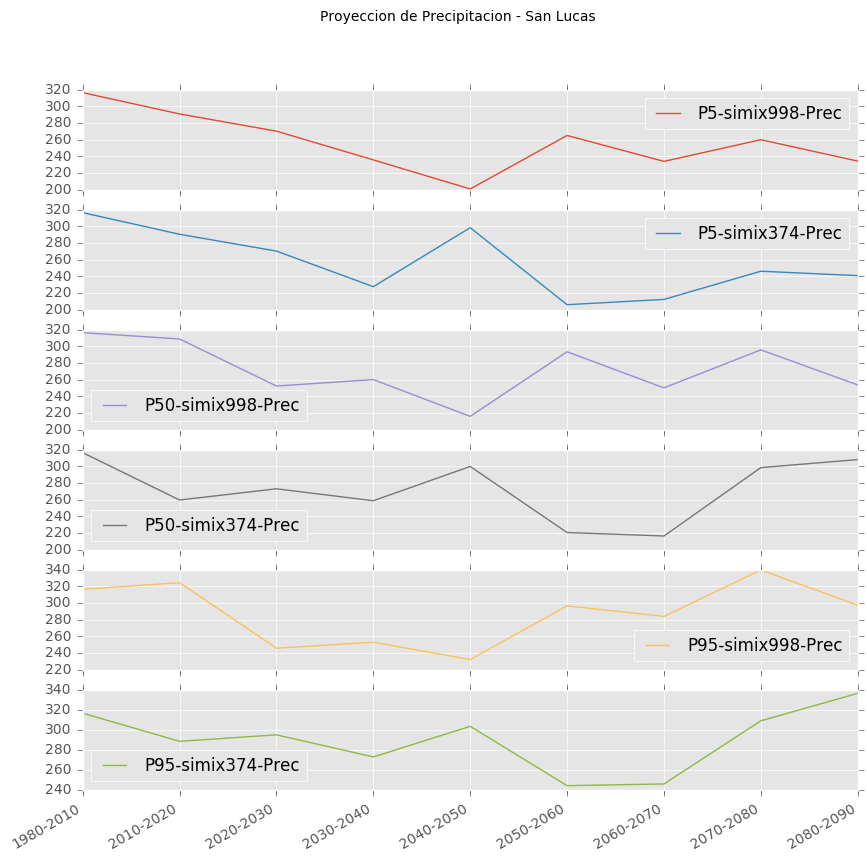

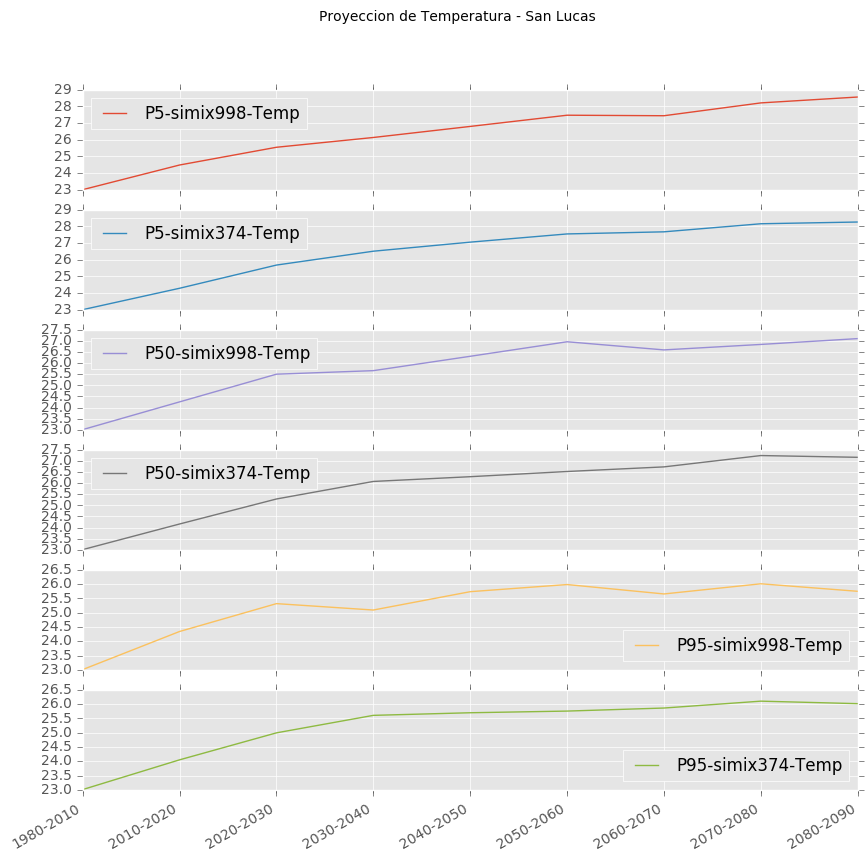

In [162]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
resumenpp.plot(subplots=True, figsize=(10,10), title="Proyeccion de Precipitacion - San Lucas")
resumentt.plot(subplots=True, figsize=(10,10), title="Proyeccion de Temperatura - San Lucas")


In [ ]:
#procesamiento de salida Simgen
for nn in range(0,len(percentiles)):
    os.chdir(path+percentiles[nn])
    simt = []
    for file in glob.glob("pp_*.csv"):
        simt.append(file[-10:-4])
    sim = remove_duplicates(simt)
    sim = [s.replace('pp_', '') for s in sim]
    sim = [s.replace('p_', '') for s in sim]
    print str("--Percentil: ")+str(percentiles[nn])
    for i in range(0,len(sim)):
        print "Trabajando en sim: "+str(sim[i])
        pp = pd.read_csv("pp_"+str(sim[i])+".csv", sep=",")
        pp.index = pd.date_range('01/31/1969', periods=len(pp), freq='M')
        tt = pd.read_csv("tprom_"+str(sim[i])+".csv", sep=",")
        tt.index = pd.date_range('01/31/1969', periods=len(tt), freq='M')
        del pp['Unnamed: 0'] 
        del tt['Unnamed: 0']
        #archivo de pp
        #mask = (pp.index > '1971-01-01') & (pp.index < '1985-01-01')
        #anual
        pp.resample('A').sum().to_excel(str(nombre_pp)+str(percentiles[nn])+str("_")+str(sim[i])+".xls",sheet_name=str(sim[i]))
        tt.resample('A').mean().to_excel(str(nombre_tt)+str(percentiles[nn])+str("_")+str(sim[i])+".xls",sheet_name=str(sim[i]))
        #10anual
        pp.resample('10A').sum().to_excel(str(nombre_pp)+str(percentiles[nn])+str("_10A_")+str(sim[i])+".xls",sheet_name=str(sim[i]))
        tt.resample('10A').mean().to_excel(str(nombre_tt)+str(percentiles[nn])+str("_10A_")+str(sim[i])+".xls",sheet_name=str(sim[i]))v